In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Advertising.csv')

In [6]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [10]:
data.duplicated().sum()

0

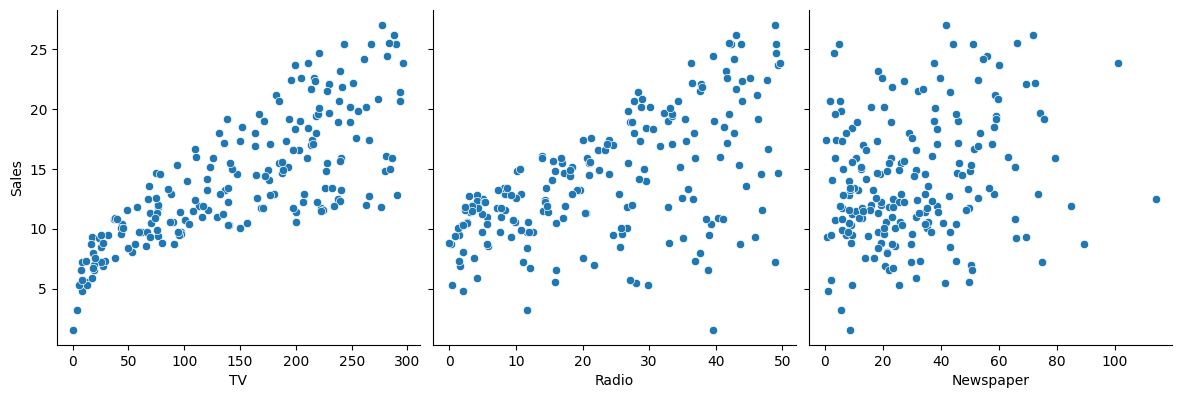

In [11]:
import seaborn as sns
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

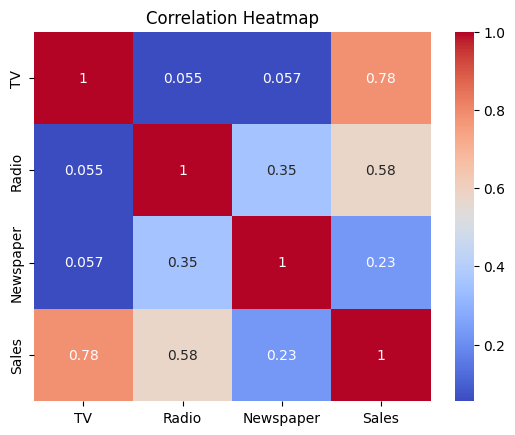

In [12]:
# Correlation heatmap to show the correlation between features
correlation = data[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
predictions = model.predict(X_test)

In [22]:
# Calculate model performance metrics
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

In [23]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 3.1740973539761033
R-squared: 0.899438024100912


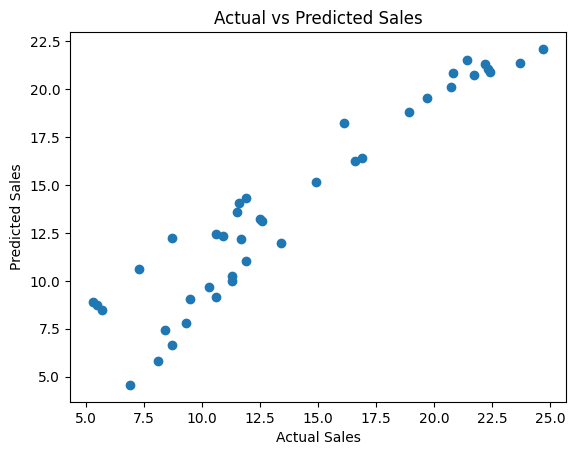

In [24]:
# Plotting actual vs predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [25]:
# Making additional predictions
additional_data = pd.DataFrame({'TV': [200, 300, 400], 'Radio': [40, 50, 60], 'Newspaper': [20, 30, 40]})
additional_predictions = model.predict(additional_data)

In [26]:
# Displaying additional predictions
for i, pred in enumerate(additional_predictions):
    print(f"Prediction {i+1}: {pred}")

Prediction 1: 19.5479952880683
Prediction 2: 25.94050872069737
Prediction 3: 32.33302215332644


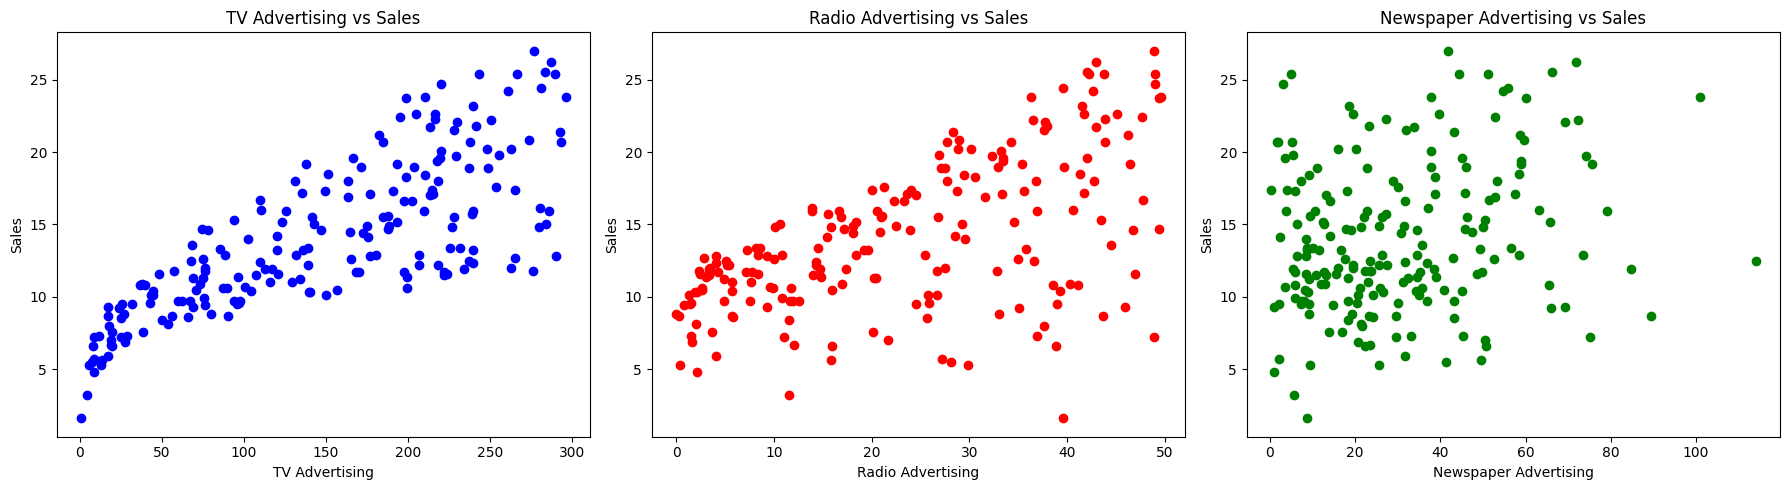

In [38]:
# Visualization of individual feature influence on sales
plt.figure(figsize=(18, 5))

# TV vs Sales
plt.subplot(131)
plt.scatter(data['TV'], data['Sales'], color='blue')
plt.title('TV Advertising vs Sales')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')


# Radio vs Sales
plt.subplot(132)
plt.scatter(data['Radio'], data['Sales'], color='red')
plt.title('Radio Advertising vs Sales')
plt.xlabel('Radio Advertising')
plt.ylabel('Sales')


# Newspaper vs Sales
plt.subplot(133)
plt.scatter(data['Newspaper'], data['Sales'], color='green')
plt.title('Newspaper Advertising vs Sales')
plt.xlabel('Newspaper Advertising')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()